## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Drug_study_base_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer" )
# Display the data table for preview
Drug_study_base_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice. (should be 249 per the overview)
print(f" The number of the mice in the study is: {Drug_study_base_df['Mouse ID'].nunique()}")

 The number of the mice in the study is: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#### Get a copy of the merged input
Drug_Analysis_Base_df = Drug_study_base_df

#### Build a count file to identify duplicate rows, and get it clean and concise
Drug_Study_Count_df = pd.DataFrame(Drug_study_base_df.groupby(["Mouse ID","Timepoint"]).count())

Drug_Study_Count_df = Drug_Study_Count_df.drop(columns=["Sex","Age_months","Weight (g)","Tumor Volume (mm3)", "Metastatic Sites"])
Drug_Study_Count_df = Drug_Study_Count_df.rename(columns={"Drug Regimen": "Count"})

#### Merge the counts with the base Data to get counts with the rows
Drug_Study_Flagged_df = pd.merge(Drug_Analysis_Base_df, Drug_Study_Count_df, on = ["Mouse ID","Timepoint"]) 

#### List the bad Mice...
Bad_Mice_IDs = Drug_Study_Flagged_df.loc[Drug_Study_Flagged_df['Count'] > 1,"Mouse ID"].unique()
print(f"Mice with Duplicate data are: \n {Bad_Mice_IDs}")

Mice with Duplicate data are: 
 ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#### Select the entries where the mouse ID matches what was found above
Bad_Mice_Data = Drug_Study_Flagged_df.loc[Drug_Study_Flagged_df['Mouse ID'] == "g989"]
print(f"The data for the Bad Mice is:\n{Bad_Mice_Data}")


The data for the Bad Mice is:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#######################################################################
############### NOTE: a few ways of doing this ########################
#######################################################################
###### Option 1 - Simple copy while deleting based on loc
# Drug_Study_Clean_Data_df = Drug_Study_Flagged_df.loc[Drug_Study_Flagged_df['Mouse ID'] != "g989"]
#######################################################################
###### Option 2 - "Dropping as described in the instructions, more complex
# index_names = Drug_Study_Clean_Data_df[(Drug_Study_Clean_Data_df['Mouse ID'] == "g989")].index 
# Drug_Study_Clean_Data_df.drop(index_names, inplace = True) 
#######################################################################

### First, create a clean copy of the data which is where we will have the bad mice "dropped" 
Drug_Study_Clean_Data_df = Drug_Study_Flagged_df.copy(deep=True)

### Get a list of the indexes with the bad mice
index_names = Drug_Study_Clean_Data_df[(Drug_Study_Clean_Data_df['Mouse ID'] == "g989")].index 
  
### drop these given row indexes from dataFrame, doing an "INPLACE DROP" 
Drug_Study_Clean_Data_df.drop(index_names, inplace = True) 

### Quick print of the clean DataFrame
print(f"\n The Clean DataFrame is: {Drug_Study_Clean_Data_df}")


 The Clean DataFrame is:      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  Count  
0              45.000000                 0      1  
1              38

In [6]:
# Checking the number of mice in the clean DataFrame
print(f"Verifying the number of Mice has been reduced from 249...we are now at: {Drug_Study_Clean_Data_df['Mouse ID'].nunique()}")

Verifying the number of Mice has been reduced from 249...we are now at: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#### Create Base Table
###### Create Summary Table with Mean as a starting column
Drug_Analysis_Summary_1_df = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean())
####### Rename the Mean Column
Drug_Analysis_Summary_1_df = Drug_Analysis_Summary_1_df.rename(columns={"Tumor Volume (mm3)": "Mean"}) 

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
##### Add the Other Summary Statistics as they are calculated 
Drug_Analysis_Summary_1_df["Median"] = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median())
Drug_Analysis_Summary_1_df["Variance"] = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var())
Drug_Analysis_Summary_1_df["Std_Deviation"] = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std())
Drug_Analysis_Summary_1_df["SEM"] = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem())

##### Print the Summary DataFrame
print(f" The Summary Dataframe created from individual Statistics is: \n\n{Drug_Analysis_Summary_1_df}")

 The Summary Dataframe created from individual Statistics is: 

                   Mean     Median   Variance  Std_Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.320930  50.446266  43.852013       6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Drug_Analysis_Summary_2_df = Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(Mean="mean",Median="median",Variance="var",Std_Deviation="std",SEM="sem")

#### Display the DataFrame
print(f" The Summary Dataframe created from single '.agg' line is:\n\n{Drug_Analysis_Summary_2_df}")

 The Summary Dataframe created from single '.agg' line is:

                   Mean     Median   Variance  Std_Deviation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.320930  50.446266  43.852013       6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398


## Bar and Pie Charts

Bar Chart using Pandas:



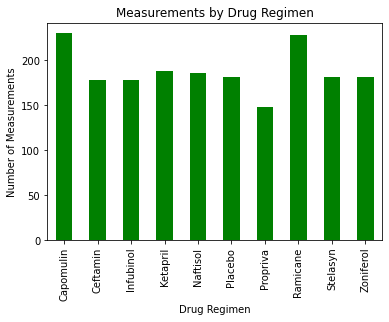

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#### this means use the "df.plot(kind=)"" approach

Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].count().plot(kind='bar',color='g', align="center",title="Measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
print(f"Bar Chart using Pandas:\n")
plt.show()

Bar Chart using pyplot:



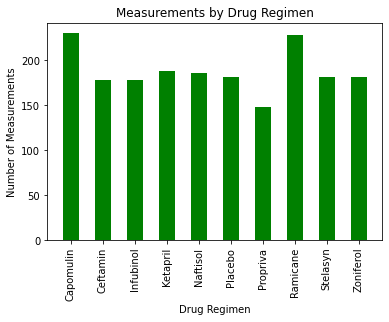

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#### create y values as sum / Meansurement Count by regimen
Drug_Bar_Data_df = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].count())
Drug_Bar_Data_df = Drug_Bar_Data_df.rename(columns={"Tumor Volume (mm3)": "Measurement_Count"}) 

#### Set x axis and tick locations
x_axis = np.arange(len(Drug_Bar_Data_df))
tick_locations = [value for value in x_axis]

#### Create the plot
plt.figure(figsize=(6,4))
plt.xticks(tick_locations, Drug_Bar_Data_df.index, rotation="vertical")
plt.title("Measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.bar(x_axis, Drug_Bar_Data_df["Measurement_Count"], width=.5, color='g', align="center")
print(f"Bar Chart using pyplot:\n")
plt.show()

Pie Chart using pandas:



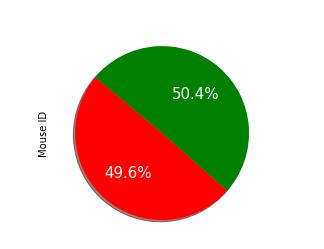

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#### this means use the "df.plot(kind=)"" approach
Drug_Study_Clean_Data_df.groupby("Sex")['Mouse ID'].nunique().plot(kind='pie',colors = ["red", "green"], textprops={'color':"w", 'size':15},autopct="%1.1f%%", shadow=True, startangle=140, title=("Breakdown of Mouse Subjects by Gender"))
plt.title("Breakdown of Mouse Subjects by Gender",color="white",size=15)
print(f"Pie Chart using pandas:\n")
plt.show()

Pie Chart using pyplot:



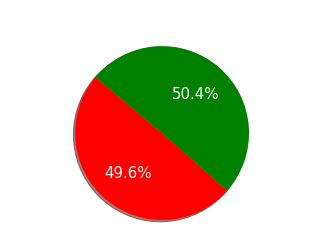

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Gender_Pie_Data_df = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Sex")['Mouse ID'].nunique())
Gender_Pie_Data_df = Gender_Pie_Data_df.rename(columns={"Mouse ID": "Mouse Subjects"}) 

# Gender_Pie_Data_df.head()
colors = ["red", "green"] 
plt.pie(Gender_Pie_Data_df["Mouse Subjects"],labels=Gender_Pie_Data_df.index, colors=colors,textprops={'color':"w", 'size':15},autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Breakdown of Mouse Subjects by Gender",color="white",size=15)
print(f"Pie Chart using pyplot:\n")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timeoint for each mouse
##### Calculate the final tumore volume for each mouse by getting the last (max) timepoint for each mouse within the 4 specified regimens
Last_Mouse_Timepoint_df = Drug_Study_Clean_Data_df.loc[Drug_Study_Clean_Data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])].groupby(["Drug Regimen","Mouse ID"],as_index=False)['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Mouse_Data_df = pd.merge(Last_Mouse_Timepoint_df,study_results, on=["Mouse ID","Timepoint"], how="left" )

#### Show some of the data - 1 row per regimen / Mouse 
print(f"Show Head of the data: \n{Mouse_Data_df.head(5)}\n")
print(f"Show Tail of the data: \n{Mouse_Data_df.tail(5)}\n")

# and the nuique is a reduced number of mice (100) since we cut back on the number of regimens to 4
print(f"Print the Count of the Mouse Data: \n{Mouse_Data_df['Mouse ID'].nunique()}")


Show Head of the data: 
  Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0    Capomulin     b128         45           38.982878                 2
1    Capomulin     b742         45           38.939633                 0
2    Capomulin     f966         20           30.485985                 0
3    Capomulin     g288         45           37.074024                 1
4    Capomulin     g316         45           40.159220                 2

Show Tail of the data: 
   Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
95     Ramicane     s508         45           30.276232                 0
96     Ramicane     u196         45           40.667713                 3
97     Ramicane     w678          5           43.166373                 0
98     Ramicane     y449         15           44.183451                 0
99     Ramicane     z578         45           30.638696                 0

Print the Count of the Mouse Data: 
100


In [19]:
# Put treatments into a list for for loop (and later for plot labels) - by getting the unique drug names 
Drug_Treatment_List = Mouse_Data_df[("Drug Regimen")].unique().tolist()
print(f"Part 1 - The drug list is: {Drug_Treatment_List} \n")
########################################
##### Need Inout here on approach ######
##### I used quantile with unstack which is much cleaner 
########################################
#### Instructions are not making sense:
# Create Empty list to fill with tumor vol data (for plotting)    ??? there is no plotting in this section ????
# locate the rows which contain mice on each drug and get the tumor values
# Add subset    ??? what does this mean ????
########################################

# Calculate the IQR and quatitatively determine if there ae any potential outliers
##### Calculate and add the quartiles, using the unstack to put into 1 row per drug regimen 
Regimen_Stats = pd.DataFrame(Mouse_Data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile([.25,.50,.75]).unstack().reset_index())

##### Calculate IQR and add to each row
Regimen_Stats["IQR"] = Regimen_Stats.loc[: , 0.75] - Regimen_Stats.loc[:,0.25]

##### Calculate lower_Bound and Upper_Bound and add to each row
Regimen_Stats["Lower_Bound"] = Regimen_Stats.loc[: , 0.25] - (1.5 * Regimen_Stats.loc[: , "IQR"])
Regimen_Stats["Upper_Bound"] = Regimen_Stats.loc[: , 0.75] + (1.5 * Regimen_Stats.loc[: , "IQR"])

print(f"Part 2 - The Regimen Stats are: \n {Regimen_Stats} \n \n")

##### Merge the stats with earch mouse row and detify if an outlier
Mouse_Check_Data = pd.merge(Mouse_Data_df,Regimen_Stats, on=["Drug Regimen"], how="left" )
print(f"Part 3 - The Merged Data is: \n {Mouse_Check_Data} \n \n")

# Determine Outliers using upper and lower bounds
Outliers = Mouse_Check_Data.loc[((Mouse_Check_Data["Tumor Volume (mm3)"] < Mouse_Check_Data["Lower_Bound"]) | (Mouse_Check_Data["Tumor Volume (mm3)"] > Mouse_Check_Data["Upper_Bound"])),:]
print(f"Part 4 - The Outlier(s): \n {Outliers} \n \n")


Part 1 - The drug list is: ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'] 

Part 2 - The Regimen Stats are: 
   Drug Regimen       0.25        0.5       0.75        IQR  Lower_Bound  \
0    Capomulin  32.377357  38.125164  40.159220   7.781863    20.704562   
1     Ceftamin  48.722078  59.851956  64.299830  15.577752    25.355450   
2    Infubinol  54.048608  60.165180  65.525743  11.477135    36.832905   
3     Ramicane  31.560470  36.561652  40.659006   9.098537    17.912664   

   Upper_Bound  
0    51.832015  
1    87.666458  
2    82.741446  
3    54.306811   
 

Part 3 - The Merged Data is: 
    Drug Regimen Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
0     Capomulin     b128         45           38.982878                 2   
1     Capomulin     b742         45           38.939633                 0   
2     Capomulin     f966         20           30.485985                 0   
3     Capomulin     g288         45           37.074024                 1   
4    

Boxplot with green diamonds for outliers:




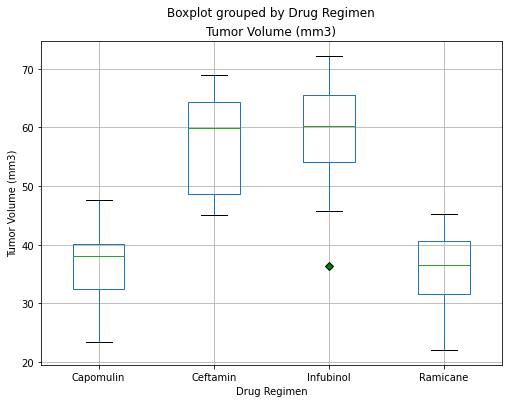

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

green_diamond = dict(markerfacecolor='g', marker='D')
boxplot = Mouse_Data_df.boxplot(by="Drug Regimen",column='Tumor Volume (mm3)',flierprops =green_diamond,figsize=(8,6))
boxplot.set_ylabel("Tumor Volume (mm3)")
print(f"Boxplot with green diamonds for outliers:\n\n")
plt.show()

## Line and Scatter Plots

Line plot for selected mouse on Capomulin regimen - mouse b128:




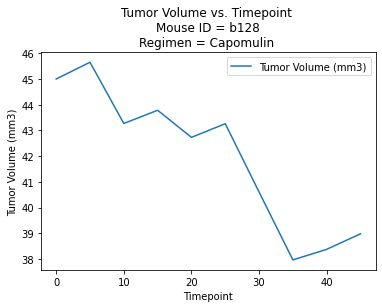

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Drug Regimen Mouse ID  
#  Capomulin     b128 


# gender_chart.set_xlabel("Gender")

Line_Chart = Drug_Study_Clean_Data_df.loc[(Drug_Study_Clean_Data_df["Mouse ID"] == "b128")].plot(x="Timepoint", y="Tumor Volume (mm3)",title="Tumor Volume vs. Timepoint \nMouse ID = b128\nRegimen = Capomulin "
);
Line_Chart.set_ylabel("Tumor Volume (mm3)")

print(f"Line plot for selected mouse on Capomulin regimen - mouse b128:\n\n")
plt.show()
# print(Drug_Study_Clean_Data_df.loc[(Drug_Study_Clean_Data_df["Mouse ID"] == "b128")])

Scatter plot for Average Tumer Volume versus Mouse Weight




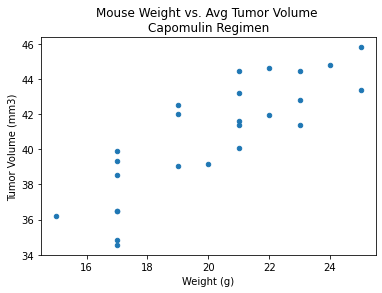

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Scatter_Data_Tumor_df = Drug_Study_Clean_Data_df.loc[Drug_Study_Clean_Data_df["Drug Regimen"] == "Capomulin"].groupby(["Drug Regimen","Mouse ID"],as_index=True)['Tumor Volume (mm3)'].mean()
Scatter_Data_Weight_df = Drug_Study_Clean_Data_df.loc[Drug_Study_Clean_Data_df["Drug Regimen"] == "Capomulin"].groupby(["Drug Regimen","Mouse ID"],as_index=True)['Weight (g)'].max()
# df.groupby(['A', 'B']).agg({'C':['mean', 'median'], 'D':'max'})

Scatter_Data_Merge_df = pd.merge(Scatter_Data_Tumor_df,Scatter_Data_Weight_df, on=["Drug Regimen","Mouse ID"])
# Scatter_Data_Merge_df
print(f"Scatter plot for Average Tumer Volume versus Mouse Weight\n\n") 
Scatter_Data_Graph = Scatter_Data_Merge_df.plot(x='Weight (g)', y="Tumor Volume (mm3)", kind="scatter",title="Mouse Weight vs. Avg Tumor Volume \nCapomulin Regimen")

## Correlation and Regression

The correlation coeficient r is: 0.8419363424694718


Scatter plot for Average Tumer Volume versus Mouse Weight
** Addition of Regression Line and equation **



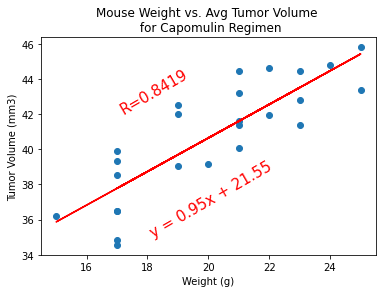

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Scatter_Data_Weight_df
y_values = Scatter_Data_Tumor_df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
R_value = "R=" + str(round(rvalue,4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,35),fontsize=15,color="red",rotation=30)
plt.annotate(R_value,(17,42),fontsize=15,color="red", rotation = 30)
plt.xlabel('Weight (g)')
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Avg Tumor Volume \n for Capomulin Regimen")

print(f"The correlation coeficient r is: {rvalue}\n\n")
print(f"Scatter plot for Average Tumer Volume versus Mouse Weight\n** Addition of Regression Line and equation **\n")
plt.show()